# Exploratory Data Analysis - EDA
## 1. Overview
The COCOMO81 dataset is a collection of software project data used to estimate development effort based on the Constructive Cost Model (COCOMO), introduced by Barry Boehm in 1981. This dataset includes 63 software projects described by 17 cost factors.

The COCOMO81 dataset consists of following attributes:
#### features
1. **rely**: required software reliability
2. **data**: database size
3. **cplx**: process complexity
4. **time**: time constraint for cpu
5. **stor**: main memory constraint
6. **virt**: machine volatility
7. **turn**: turnaround time
8. **acap**: analysts capability
9. **aexp**: application experience
10. **pcap**: programmers capability
11. **vexp**: virtual machine experience
12. **lexp**: language experience
13. **modp**: modern programing practices
14. **tool**: use of software tools
15. **sced**: schedule constraint
#### target
16. **loc**: lines of code
17. **actual**: actual cost



## Import libraries

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Input, Dense, Dropout # type: ignore
from sklearn.metrics import r2_score

## Data loading

In [4]:
data = arff.loadarff('cocomo81.arff')
df= pd.DataFrame(data[0])
df.to_csv('cocomo81.csv',index=False)
df = pd.read_csv('cocomo81.csv')
print(df.columns.tolist())

['rely', 'data', 'cplx', 'time', 'stor', 'virt', 'turn', 'acap', 'aexp', 'pcap', 'vexp', 'lexp', 'modp', 'tool', 'sced', 'loc', 'actual']


## Data inspection

### Checking dataset structure

In [6]:
df.head(10)

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
0,0.88,1.16,0.70,1.00,1.06,1.15,1.07,1.19,1.13,1.17,1.10,1.00,1.24,1.10,1.04,113.0,2040.0
1,0.88,1.16,0.85,1.00,1.06,1.00,1.07,1.00,0.91,1.00,0.90,0.95,1.10,1.00,1.00,293.0,1600.0
2,1.00,1.16,0.85,1.00,1.00,0.87,0.94,0.86,0.82,0.86,0.90,0.95,0.91,0.91,1.00,132.0,243.0
3,0.75,1.16,0.70,1.00,1.00,0.87,1.00,1.19,0.91,1.42,1.00,0.95,1.24,1.00,1.04,60.0,240.0
4,0.88,0.94,1.00,1.00,1.00,0.87,1.00,1.00,1.00,0.86,0.90,0.95,1.24,1.00,1.00,16.0,33.0
5,0.75,1.00,0.85,1.00,1.21,1.00,1.00,1.46,1.00,1.42,0.90,0.95,1.24,1.10,1.00,4.0,43.0
6,0.75,1.00,1.00,1.00,1.00,0.87,0.87,1.00,1.00,1.00,0.90,0.95,0.91,0.91,1.00,6.9,8.0
7,1.15,0.94,1.30,1.66,1.56,1.30,1.00,0.71,0.91,1.00,1.21,1.14,1.10,1.10,1.08,22.0,1075.0
8,1.15,0.94,1.30,1.30,1.21,1.15,1.00,0.86,1.00,0.86,1.10,1.07,0.91,1.00,1.00,30.0,423.0
9,1.40,0.94,1.30,1.11,1.56,1.00,1.07,0.86,0.82,0.86,0.90,1.00,1.00,1.00,1.00,29.0,321.0


### Identifying data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rely    63 non-null     float64
 1   data    63 non-null     float64
 2   cplx    63 non-null     float64
 3   time    63 non-null     float64
 4   stor    63 non-null     float64
 5   virt    63 non-null     float64
 6   turn    63 non-null     float64
 7   acap    63 non-null     float64
 8   aexp    63 non-null     float64
 9   pcap    63 non-null     float64
 10  vexp    63 non-null     float64
 11  lexp    63 non-null     float64
 12  modp    63 non-null     float64
 13  tool    63 non-null     float64
 14  sced    63 non-null     float64
 15  loc     63 non-null     float64
 16  actual  63 non-null     float64
dtypes: float64(17)
memory usage: 8.5 KB


### Check for duplication

In [9]:
df.nunique()

rely       6
data       6
cplx       8
time      11
stor       5
virt       4
turn       5
acap       7
aexp       5
pcap       7
vexp       4
lexp       4
modp       6
tool       6
sced       4
loc       54
actual    61
dtype: int64

### Missing data

In [3]:
df.isnull().sum()

rely      0
data      0
cplx      0
time      0
stor      0
virt      0
turn      0
acap      0
aexp      0
pcap      0
vexp      0
lexp      0
modp      0
tool      0
sced      0
loc       0
actual    0
dtype: int64

### Summary statistics of dataframe

In [12]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
rely,63.0,1.036349,0.193477,0.75,0.88,1.00,1.15,1.40
data,63.0,1.003968,0.073431,0.94,0.94,1.00,1.04,1.16
cplx,63.0,1.091429,0.202563,0.70,1.00,1.07,1.30,1.65
time,63.0,1.113810,0.161639,1.00,1.00,1.06,1.11,1.66
stor,63.0,1.143810,0.179420,1.00,1.00,1.06,1.21,1.56
virt,63.0,1.008413,0.120593,0.87,0.87,1.00,1.15,1.30
turn,63.0,0.971746,0.080973,0.87,0.87,1.00,1.00,1.15
acap,63.0,0.905238,0.151507,0.71,0.86,0.86,1.00,1.46
aexp,63.0,0.948571,0.119243,0.82,0.82,1.00,1.00,1.29
pcap,63.0,0.937460,0.166510,0.70,0.86,0.86,1.00,1.42


Explain:
- **count**: The number of non-missing (non-NaN) values ​​in each column.
- **mean**: Average value of the column (applies to numeric data only).
- **std**: Standard deviation, which shows the dispersion of numerical data
- **min**: The smallest value in the column (for numeric data).
- **25%**: 25th percentile (Q1), i.e. 25% of values ​​are less than this level.
- **50%**: 50th percentile (Q2, median), i.e. values ​​that are in the middle of the data set.
- **75%**: 75th percentile (Q3), i.e. 75% of values ​​are less than this level.
- **max**: The largest value in the column (for numeric data).

### Univariate analysis

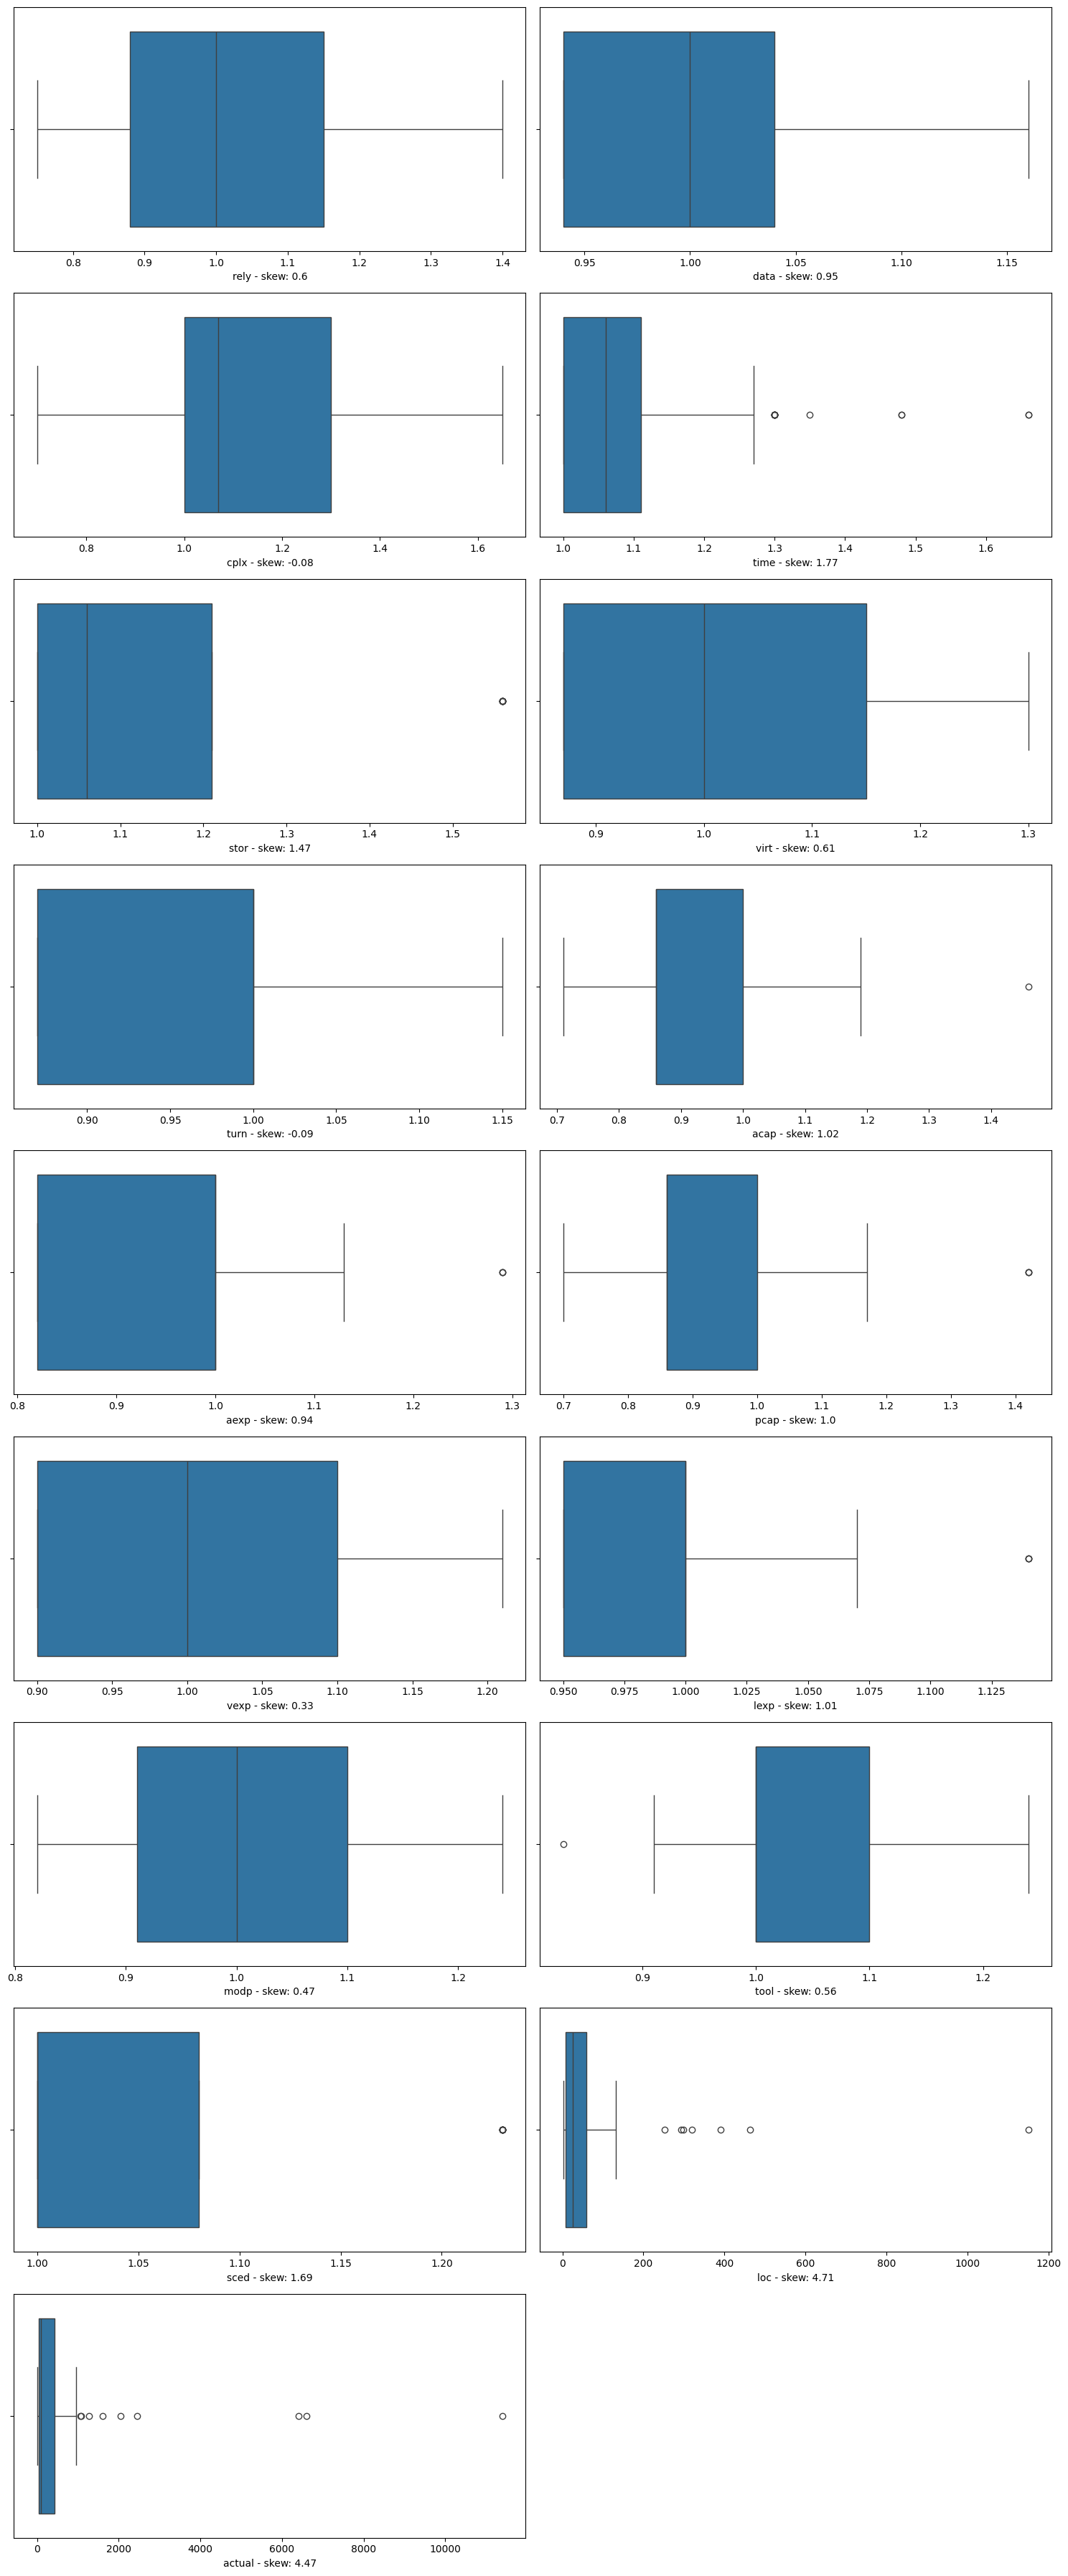

In [55]:
fig, axes = plt.subplots(9, 2, figsize=(15, 36))

axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_xlabel(f'{col} - skew: {round(df[col].skew(), 2)}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Bivariate analysis

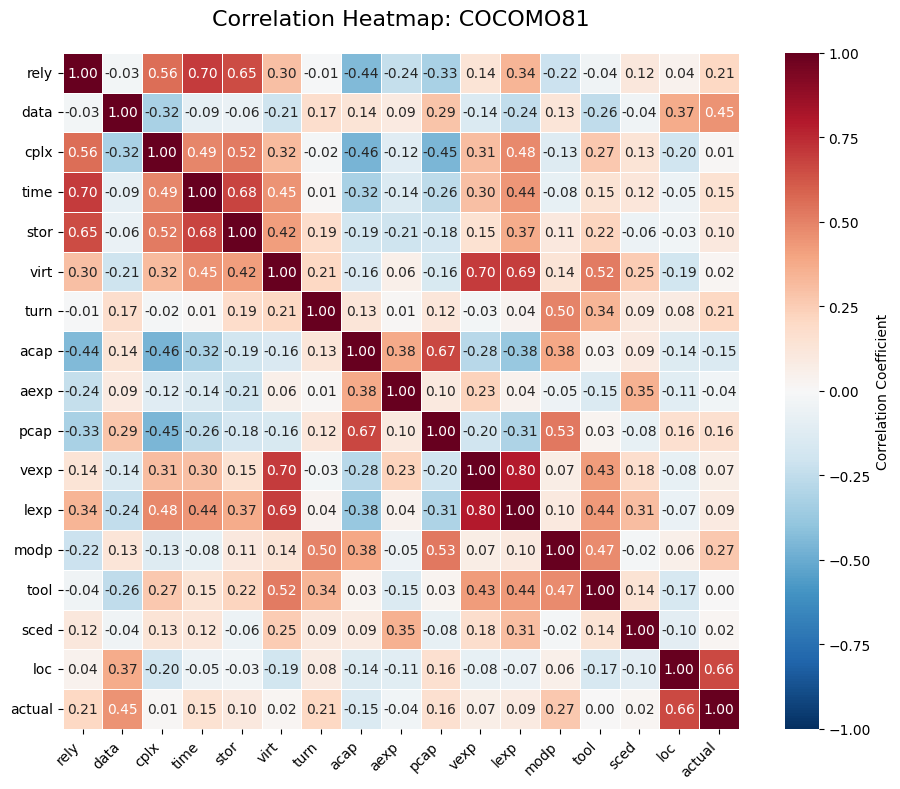

In [34]:
plt.figure(figsize=(10, 8))  # Set figure size to match the example
sns.heatmap(df.corr(), 
            annot=True,            # Show correlation values in cells
            cmap='RdBu_r',         # Red-Blue reversed (red for positive, blue for negative)
            fmt='.2f',             # Format to 2 decimal places
            square=True,           # Make cells square
            linewidths=0.5,        # Add lines between cells
            cbar_kws={'label': 'Correlation Coefficient', 'shrink': 1},  # Customize color bar
            vmin=-1, vmax=1)       # Set the range of the color scale

plt.title('Correlation Heatmap: COCOMO81', fontsize=16, pad=20)  # Match the title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.yticks(rotation=0)               # Keep y-axis labels horizontal
plt.tight_layout()                   # Adjust layout

# Step 5: Display the heatmap
plt.show()

### Outliers handling

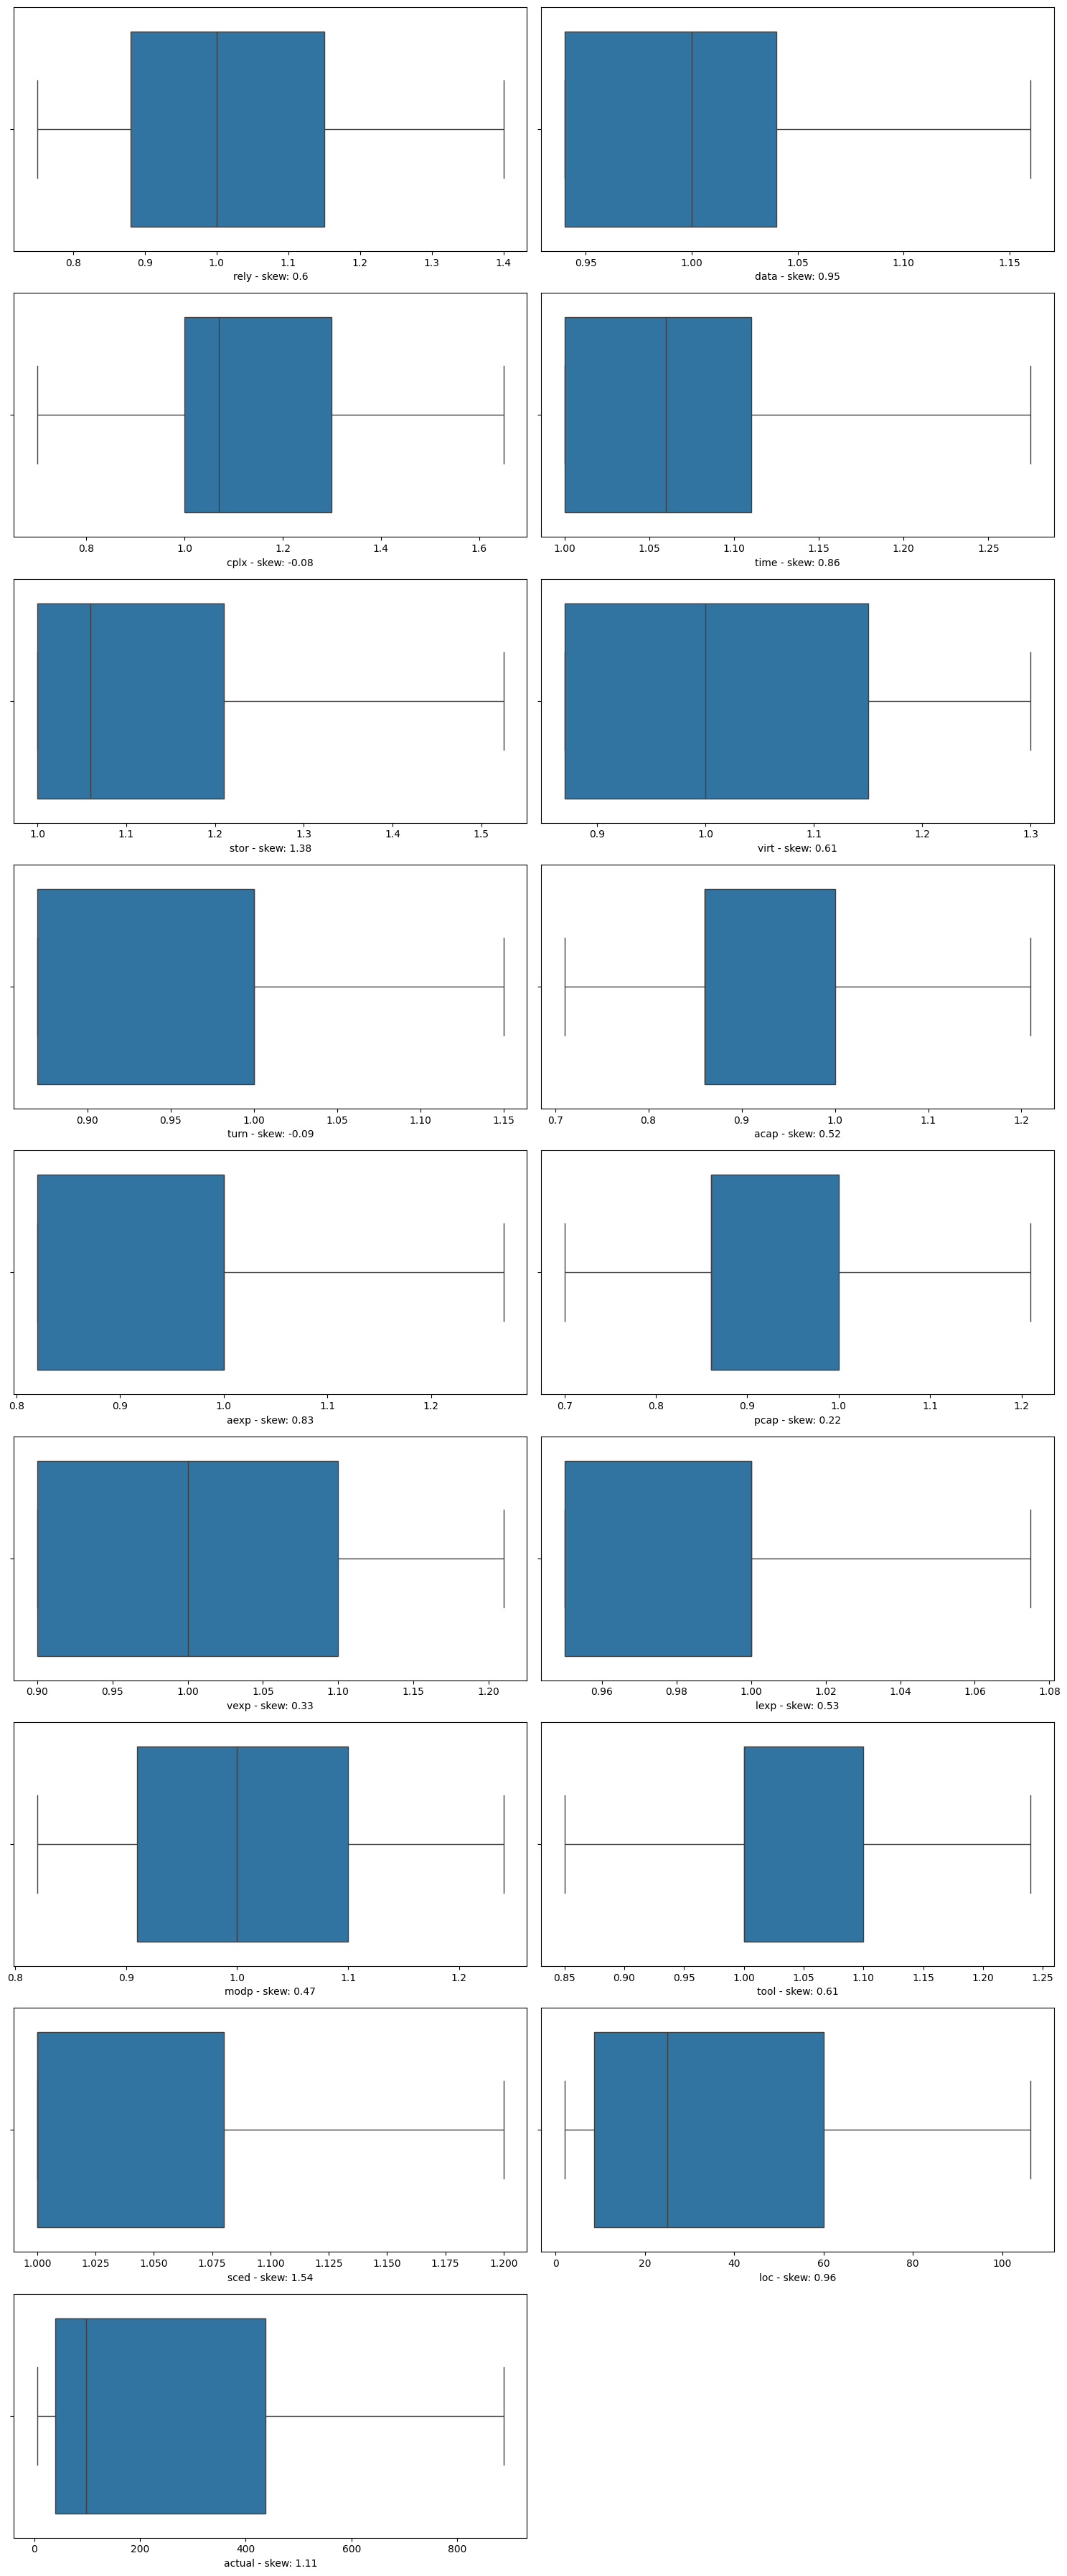

In [ ]:
df_cleaned = df.copy()
for col in ['time', 'stor', 'acap', 'aexp', 'pcap', 'lexp', 'sced', 'tool']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df_cleaned[col] = df_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

for col in ['loc', 'actual']:
    percentile = df[col].quantile(0.85)
    df_cleaned[col] = df_cleaned[col].clip(upper=percentile)

fig, axes = plt.subplots(9, 2, figsize=(15, 36))

axes = axes.flatten()

for i, col in enumerate(df_cleaned.columns):
    sns.boxplot(x=df_cleaned[col], ax=axes[i])
    axes[i].set_xlabel(f'{col} - skew: {round(df_cleaned[col].skew(), 2)}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Save cleaned data

In [ ]:
df_cleaned = df_cleaned.round(4)
df_cleaned.to_csv("cocomo81_preprocessed.csv", index=False)

### Distribute data into training, testing and validation

In [5]:
df = pd.read_csv('cocomo81_preprocessed.csv')
df.describe()

,rely,data,cplx,time,stor,virt,turn,acap,aexp,pcap,vexp,lexp,modp,tool,sced,loc,actual
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.036349,1.003968,1.091429,1.091746,1.138730,1.008413,0.971746,0.901270,0.947619,0.92746,1.005238,0.998571,1.004127,1.017302,1.045079,38.051111,270.860317
std,0.193477,0.073431,0.202563,0.110008,0.167558,0.120593,0.080973,0.139544,0.116518,0.14125,0.093375,0.045432,0.130935,0.085066,0.066427,36.567822,320.090029
min,0.750000,0.940000,0.700000,1.000000,1.000000,0.870000,0.870000,0.710000,0.820000,0.70000,0.900000,0.950000,0.820000,0.850000,1.000000,1.980000,5.900000
25%,0.880000,0.940000,1.000000,1.000000,1.000000,0.870000,0.870000,0.860000,0.820000,0.86000,0.900000,0.950000,0.910000,1.000000,1.000000,8.650000,40.500000
50%,1.000000,1.000000,1.070000,1.060000,1.060000,1.000000,1.000000,0.860000,1.000000,0.86000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,98.000000
75%,1.150000,1.040000,1.300000,1.110000,1.210000,1.150000,1.000000,1.000000,1.000000,1.00000,1.100000,1.000000,1.100000,1.100000,1.080000,60.000000,438.000000
max,1.400000,1.160000,1.650000,1.280000,1.520000,1.300000,1.150000,1.210000,1.270000,1.21000,1.210000,1.080000,1.240000,1.240000,1.200000,106.400000,887.800000


In [ ]:
features = [col for col in df.columns if col not in ['loc', 'actual']]
target = 'actual'
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train size: {X_train.shape}')
print(f'X_test size: {X_test.shape}')

X_train size: (50, 15)
X_test size: (13, 15)


### Standard scale

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Multilayer perceptron

### Training a Multilayer Perceptron model

In [8]:
model = Sequential([
    Input(shape=(15,)),
    Dense(64, activation='relu'),  # First hidden layer
    Dropout(0,2),
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(1)  # Output layer for regression
])
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

# Fit the model on training data and validate on test data
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=300,
    batch_size=8,
    callbacks=[early_stopping]
)

Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 202796.2188 - mae: 309.7440 - val_loss: 142956.8281 - val_mae: 227.6512
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109409.2969 - mae: 204.5765 - val_loss: 142723.1562 - val_mae: 227.1858
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 158865.1875 - mae: 259.5580 - val_loss: 142467.7969 - val_mae: 226.6781
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 170745.9219 - mae: 269.3098 - val_loss: 142205.5312 - val_mae: 226.1343
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 166428.7344 - mae: 259.3939 - val_loss: 141913.5625 - val_mae: 225.5336
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 215505.5625 - mae: 313.7106 - val_loss: 141590.0625 - val_mae: 224.8648
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 126558.3750 - mae: 221.6781 - val_loss: 141241.7500 - val_mae: 224.1545
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 207726.0938 - mae: 306.4318 - val_loss:

### Applying PSO to optimize MLP hyperparameters
- Hyperparameters to be optimized
    - hidden layer sizes (int)
    - units per layer (int)
    - activation (relu, tanh, sigmod)
    - dropout rate (float)
    - optimizer (adam, sgd, rmsprop)
    - learning rate (float)
    - batch size (int)

In [ ]:
# Define bound for each parameter
param_bounds = {
    'hlayer_sizes': (1, 5),            
    'units': (8, 64),
    'dropout_rate': (0.0, 0.5),            
    'learning_rate': (0.001, 0.01),
    'batch_size': (4, 16),
}
activation_list = ['relu', 'tanh', 'sigmod']
optimizer_list = ['adam', 'sgd', 'rmsprop']


# Define MLP model building function
def build_mlp_model(params, activation, optimizer_name):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(15,)))

    for _ in range(int(params['hlayer_sizes'])):
        model.add(tf.keras.layers.Dense(int(params['units']), activation=activation))
        model.add(tf.keras.layers.Dropout(params['dropout_rate']))

    model.add(tf.keras.layers.Dense(1))

    optimizer = {
        'adam': tf.keras.optimizers.Adam,
        'sgd': tf.keras.optimizers.SGD,
        'rmsprop': tf.keras.optimizers.RMSprop
    }[optimizer_name](learning_rate=params['learning_rate'])

    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['mae'])
    return model

def evaluate_model(params, activation_idx, optimizer_idx):
    activation = activation_list[int(activation_idx)]
    optimizer = optimizer_list[int(optimizer_idx)]

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=10, 
        restore_best_weights=True
    )
    model = build_mlp_model(params, activation, optimizer)
    history = model.fit(X_train, y_train,
                        validation_data=(X_test, y_test),
                        epochs=200,
                        verbose=0,
                        batch_size=int(params['batch_size']),
                        callbacks=[early_stopping])
    
    val_mae = history.history['val_mae'][-1]
    return val_mae

# Define particle class
class Particle:
    def __init__(self):
        self.position = {
            'hlayer_sizes': np.random.uniform(*param_bounds['hlayer_sizes']),
            'units': np.random.uniform(*param_bounds['units']),
            'dropout_rate': np.random.uniform(*param_bounds['dropout_rate']),
            'learning_rate': np.random.uniform(*param_bounds['learning_rate']),
            'batch_size': np.random.uniform(*param_bounds['batch_size']),
            'activation_idx': random.randint(0, len(activation_list) - 1),
            'optimizer_idx': random.randint(0, len(optimizer_list) - 1),
        }
        self.velocity = {key: 0 for key in self.position}
        self.best_position = dict(self.position)
        self.best_score = float('inf')

#Define pso function
def pso(n_particles=5, n_iterations=10, w=0.5, c1=1, c2=2):
    swarm = [Particle() for _ in range(n_particles)]
    global_best = {'score': float('inf'), 'position': None}

    for iteration in range(n_iterations):
        print(f"Iteration {iteration+1}/{n_iterations}")
        for particle in swarm:
            score = evaluate_model(particle.position,
                                   particle.position['activation_idx'],
                                   particle.position['optimizer_idx'])

            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = dict(particle.position)

            if score < global_best['score']:
                global_best['score'] = score
                global_best['position'] = dict(particle.position)

        for particle in swarm:
            for key in particle.position:
                r1, r2 = np.random.rand(), np.random.rand()
                cognitive = c1 * r1 * (particle.best_position[key] - particle.position[key])
                social = c2 * r2 * (global_best['position'][key] - particle.position[key])
                particle.velocity[key] = w * particle.velocity[key] + cognitive + social
                particle.position[key] += particle.velocity[key]

                # Clamp position to bounds
                if key in param_bounds:
                    low, high = param_bounds[key]
                    particle.position[key] = np.clip(particle.position[key], low, high)

                elif key.endswith('_idx'):
                    particle.position[key] = int(np.clip(particle.position[key], 0, len(activation_list) - 1))

    return global_best